In [75]:
import pandas as pd
from sodapy import Socrata
import datetime
import gmaps
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.lines as mlines
import gmaps.datasets

import folium
from folium import plugins
import seaborn as sns; sns.set()


In [44]:
speed_df = pd.read_csv('Speed_Camera_Violations.csv')
speed_df.head()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
0,10318 S INDIANAPOLIS,CHI120,06/10/2019,83,1.203645e+06,1.837056e+06,41.707577,-87.529848,"(41.70757690291348, -87.52984826112849)",47.0,21202.0,49.0,705.0,47.0
1,1110 S PULASKI RD,CHI163,06/10/2019,23,1.149841e+06,1.894931e+06,41.867603,-87.725383,"(41.86760272243294, -87.7253827433152)",36.0,21572.0,30.0,98.0,14.0
2,1111 N HUMBOLDT,CHI010,06/10/2019,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11144 S VINCENNES,CHI023,06/10/2019,34,1.166994e+06,1.830711e+06,41.691025,-87.664248,"(41.69102545584918, -87.6642476900556)",33.0,22212.0,74.0,378.0,42.0
4,11153 S VINCENNES,CHI022,06/10/2019,10,1.167029e+06,1.830594e+06,41.690702,-87.664122,"(41.690701951255015, -87.66412238501842)",45.0,22212.0,74.0,378.0,22.0


In [45]:
speed_df['VIOLATION DATE'] = pd.to_datetime(speed_df['VIOLATION DATE'])
speed_df_drop = speed_df.dropna()

In [46]:
#uber dataframe
uber_df = pd.read_csv('rs_filter_csv.csv')
uber_df

,MONTH_REPORTED,NUMBER_OF_TRIPS_2015,NUMBER_OF_TRIPS_2016,NUMBER_OF_TRIPS_2017,NUMBER_OF_TRIPS_2018
0,1,518539,1733583,3582540,4842911
1,2,518539,1732573,3455601,4718735
2,3,712521,1887034,4017804,5284216
3,4,764487,2014292,3839776,3500907
4,5,868650,2184055,4039394,3580748
5,6,876603,2256966,4007753,5292651
6,7,956447,2690828,4109970,5052784
7,8,1041740,2764145,4129588,5236080
8,9,1098735,2813310,4084594,4981605
9,10,1140334,3250032,4523491,5230188


Text(0.5, 0, 'Month')

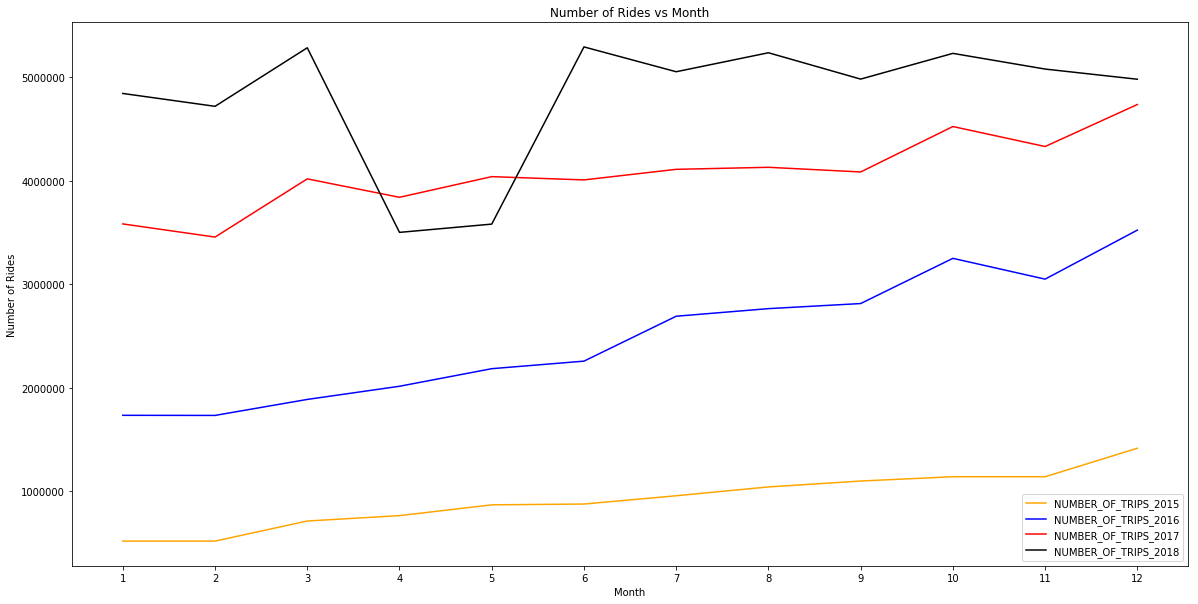

In [47]:
#uber line graph
fig,ax = plt.subplots(figsize=(20,10))
uber_graph_15 = uber_df.plot(kind='line', x = 'MONTH_REPORTED', y = 'NUMBER_OF_TRIPS_2015', ax = ax, color = 'orange')
uber_graph_16 = uber_df.plot(kind='line', x = 'MONTH_REPORTED', y = 'NUMBER_OF_TRIPS_2016', ax = ax, color = 'b',
                            title = 'Number of Rides vs Month')
uber_graph_17 = uber_df.plot(kind='line', x = 'MONTH_REPORTED', y = 'NUMBER_OF_TRIPS_2017', ax = ax, color = 'r')
uber_graph_18 = uber_df.plot(kind='line', x = 'MONTH_REPORTED', y = 'NUMBER_OF_TRIPS_2018', ax = ax, color = 'black')
plt.ylabel('Number of Rides')     
plt.xticks(np.arange(1,13))
plt.xlabel('Month')

In [48]:
# filtered by date
speed_18 = speed_df_drop[(speed_df_drop['VIOLATION DATE']>=datetime.date(2018,1,1)) & (speed_df_drop['VIOLATION DATE']<=datetime.date(2018,12,31))]
speed_17 = speed_df_drop[(speed_df_drop['VIOLATION DATE']>=datetime.date(2017,1,1)) & (speed_df_drop['VIOLATION DATE']<=datetime.date(2017,12,31))]
speed_16 = speed_df_drop[(speed_df_drop['VIOLATION DATE']>=datetime.date(2016,1,1)) & (speed_df_drop['VIOLATION DATE']<=datetime.date(2016,12,31))]
speed_15 = speed_df_drop[(speed_df_drop['VIOLATION DATE']>=datetime.date(2015,1,1)) & (speed_df_drop['VIOLATION DATE']<=datetime.date(2015,12,31))]
speed_14 = speed_df_drop[(speed_df_drop['VIOLATION DATE']>=datetime.date(2014,1,1)) & (speed_df_drop['VIOLATION DATE']<=datetime.date(2014,12,31))]

C:\Users\consi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
C:\Users\consi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\consi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the

In [49]:
speed_18_winter = speed_df_drop[(speed_df_drop['VIOLATION DATE']>=datetime.date(2018,1,1)) & (speed_df_drop['VIOLATION DATE']<=datetime.date(2018,12,31))]


C:\Users\consi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [50]:
#groupby
speed_camera_18 = speed_18.groupby(['CAMERA ID','LATITUDE','LONGITUDE'])
speed_camera_17 = speed_17.groupby(['CAMERA ID','LATITUDE','LONGITUDE'])
speed_camera_16 = speed_16.groupby(['CAMERA ID','LATITUDE','LONGITUDE'])
speed_camera_15 = speed_15.groupby(['CAMERA ID','LATITUDE','LONGITUDE'])
speed_camera_14 = speed_14.groupby(['CAMERA ID','LATITUDE','LONGITUDE'])

In [51]:
#sort18
sorted_speed_18 = speed_camera_18["VIOLATIONS"].sum().sort_values(ascending=False).reset_index()
top_20_18 = sorted_speed_18.head(20)
#sort17
sorted_speed_17 = speed_camera_17["VIOLATIONS"].sum().sort_values(ascending=False).reset_index()
top_20_17 = sorted_speed_17.head(20)
#sort16
sorted_speed_16 = speed_camera_16["VIOLATIONS"].sum().sort_values(ascending=False).reset_index()
top_20_16 = sorted_speed_16.head(20)
#sort15
sorted_speed_15 = speed_camera_15["VIOLATIONS"].sum().sort_values(ascending=False).reset_index()
top_20_15 = sorted_speed_15.head(20)
#sort14
sorted_speed_14 = speed_camera_14["VIOLATIONS"].sum().sort_values(ascending=False).reset_index()
top_20_14 = sorted_speed_14.head(20)

In [52]:
#total violations per year
violations_18 = sorted_speed_18['VIOLATIONS'].sum()
violations_17 = sorted_speed_17['VIOLATIONS'].sum()
violations_16 = sorted_speed_16['VIOLATIONS'].sum()
violations_15 = sorted_speed_15['VIOLATIONS'].sum()
violations_14 = sorted_speed_14['VIOLATIONS'].sum()
#total violations dataframe
total_violations = pd.DataFrame({
    '2014':[violations_14],
    '2015':[violations_15],
    '2016':[violations_16],
    '2017':[violations_17],
    '2018':[violations_18]
})
vio = total_violations.T


Text(0.91, 0.5, '2014 started in July')

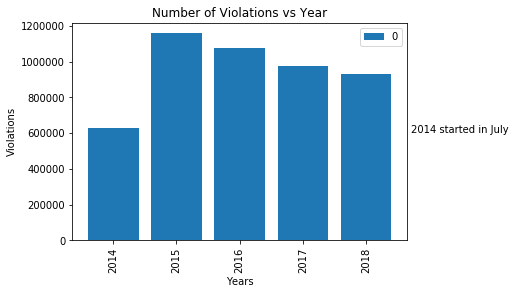

In [53]:
#total violation plot
year = [1,2,3,4,5]
textstr = '2014 started in July'
violation_plot = vio.plot(kind = 'bar', align = 'center', width = .8, title = 'Number of Violations vs Year',
                                      )
violation_plot.set_xlabel('Years')
violation_plot.set_ylabel('Violations')
plt.gcf().text(.91, .5, textstr, fontsize=10)
#vio.plot(legend=None)

In [54]:
#line graph data
speed_camera_18_date = speed_18.groupby(['VIOLATION DATE'])

date_18 = speed_camera_18_date['VIOLATIONS'].sum().reset_index()

speed_camera_17_date = speed_17.groupby(['VIOLATION DATE'])

date_17 = speed_camera_17_date['VIOLATIONS'].sum().reset_index()

speed_camera_16_date = speed_16.groupby(['VIOLATION DATE'])

date_16 = speed_camera_16_date['VIOLATIONS'].sum().reset_index()

speed_camera_15_date = speed_15.groupby(['VIOLATION DATE'])

date_15 = speed_camera_15_date['VIOLATIONS'].sum().reset_index()

speed_camera_14_date = speed_14.groupby(['VIOLATION DATE'])

date_14 = speed_camera_14_date['VIOLATIONS'].sum().reset_index()


Text(0.5, 1.0, 'Number of Violations vs Year')

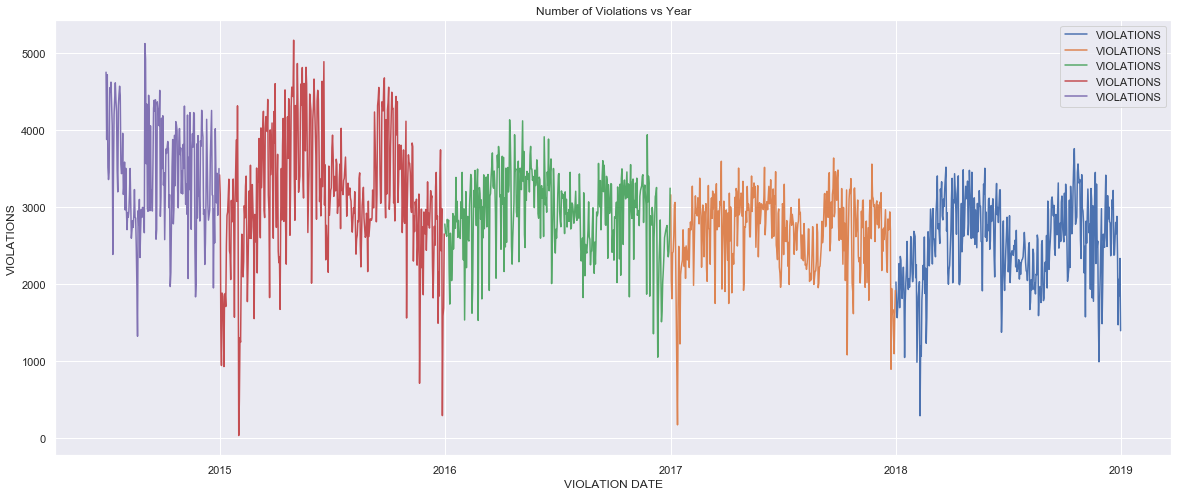

In [77]:
#line graphs by date
fig,ax = plt.subplots(figsize=(20,8))
line_18 = date_18.plot(kind = 'line', x = 'VIOLATION DATE', y = 'VIOLATIONS' , ax = ax)
line_18.set_ylabel('VIOLATIONS')

line_17 = date_17.plot(kind = 'line', x = 'VIOLATION DATE', y = 'VIOLATIONS' , ax = ax)
line_17.set_ylabel('VIOLATIONS')

line_16 = date_16.plot(kind = 'line', x = 'VIOLATION DATE', y = 'VIOLATIONS' , ax = ax)
line_16.set_ylabel('VIOLATIONS')

line_15 = date_15.plot(kind = 'line', x = 'VIOLATION DATE', y = 'VIOLATIONS' , ax = ax)
line_15.set_ylabel('VIOLATIONS')

line_14 = date_14.plot(kind = 'line', x = 'VIOLATION DATE', y = 'VIOLATIONS' , ax = ax)
line_14.set_ylabel('VIOLATIONS')
plt.title('Number of Violations vs Year')

In [56]:
#map info total
total_group = speed_df.groupby(['CAMERA ID','LATITUDE','LONGITUDE'])
violations_total = total_group['VIOLATIONS'].sum().reset_index()

locations_total= violations_total[["LATITUDE","LONGITUDE"]]
rating_total =violations_total["VIOLATIONS"].astype(float)

chicago_center = (41.8781,-87.6298)


In [57]:
#map size
figure_layout = {
    'width': '500px',
    'height': '500px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

In [72]:
#map cameras violations from 2014-2018

fig_total = gmaps.figure(layout = figure_layout,center = chicago_center, zoom_level = 9.85, map_type = 'HYBRID')

heat_layer = gmaps.heatmap_layer(locations_total, weights=rating_total, dissipating = False, max_intensity = .5, point_radius =.01)

fig_total.add_layer(heat_layer)
fig_total


Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

In [59]:
#map info top 20 2018
locations_18 = top_20_18[["LATITUDE","LONGITUDE"]]
rating_18 =top_20_18["VIOLATIONS"].astype(float)

In [60]:
#map top 20 in 2018
fig_18 = gmaps.figure(layout = figure_layout,center = chicago_center, zoom_level = 9.5, map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations_18, weights=rating_18, dissipating = False, max_intensity = .5, point_radius =.01)

point_layers = gmaps.symbol_layer(locations_18, fill_color='green', stroke_color='green', scale=2)
fig_18.add_layer(heat_layer)

#fig.add_layer(point_layers)


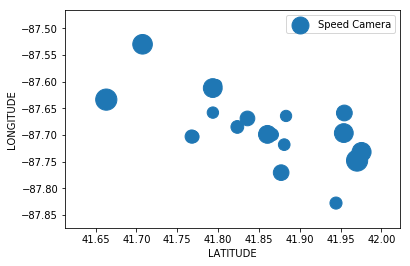

In [61]:
#scatter
top_20_18.plot(kind = 'scatter', x = 'LATITUDE', y = 'LONGITUDE', s = rating_18/100, label = 'Speed Camera')

In [62]:
#date chart
date_group = speed_18.groupby(['VIOLATION DATE'])

In [63]:
#date chart
date_count = date_group.sum()
date_count.sort_values(by='VIOLATIONS', ascending = False).head(1)

,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
VIOLATION DATE,,,,,,,,,,
2018-10-17,3759,1.633285e+08,2.667687e+08,5902.162911,-12364.887883,3727.0,2722728.0,5619.0,54928.0,3818.0


In [64]:
#total violations from 2014 throught 2018
m = folium.Map(location=chicago_center, zoom_start = 10.29)
m.add_children(plugins.HeatMap(locations_total, radius=15))

C:\Users\consi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
# Top 20 cameras from 2014
top_20 = top_20_14['CAMERA ID'].to_frame()

In [66]:
#top 20 cameras from 2014 merged into the 2015 through 2018

merger_15 = sorted_speed_15.merge(top_20, how = 'inner').sort_values('VIOLATIONS')
merger_16 = sorted_speed_16.merge(top_20, how = 'inner').sort_values('VIOLATIONS')
merger_17 = sorted_speed_17.merge(top_20, how = 'inner').sort_values('VIOLATIONS')
merger_18 = sorted_speed_18.merge(top_20, how = 'inner').sort_values('VIOLATIONS')
merg_15 = merger_15.rename(columns = ({'VIOLATIONS':'Violations_2015'}))
merg_16 = merger_16.rename(columns = ({'VIOLATIONS':'Violations_2016'}))
merg_17 = merger_17.rename(columns = ({'VIOLATIONS':'Violations_2017'}))
merg_18 = merger_18.rename(columns = ({'VIOLATIONS':'Violations_2018'}))

#form into a dataframe

top = top_20_14.rename(columns= {'VIOLATIONS':'Violations_2014'}).sort_values('Violations_2014')
violations_1 = top.merge(merg_15, how='inner')
violations_11 = violations_1.merge(merg_16, how = 'inner')
violations_111 = violations_11.merge(merg_17, how = 'inner')
violations_final = violations_111.merge(merg_18, how = 'inner')
violations_final['Total']=violations_final['Violations_2014']+violations_final['Violations_2015']+violations_final['Violations_2016']+violations_final['Violations_2017']+violations_final['Violations_2018']
violations_finals = violations_final.sort_values('Total')
violations_finals

,CAMERA ID,LATITUDE,LONGITUDE,Violations_2014,Violations_2015,Violations_2016,Violations_2017,Violations_2018,Total
9,CHI050,41.953330,-87.764267,12023,11020,10001,11767,9325,54136
0,CHI004,41.974333,-87.728347,9308,12793,12169,11794,10748,56812
2,CHI051,42.000260,-87.689803,9709,17148,14295,11688,7709,60549
5,CHI019,41.866364,-87.699143,10490,12532,14375,13064,15181,65642
3,CHI091,41.926419,-87.668042,10230,17543,15484,12807,10649,66713
4,CHI024,41.990282,-87.708245,10278,11363,20010,14928,12603,69182
10,CHI121,41.793645,-87.657861,14660,15871,14475,11952,12950,69908
6,CHI083,41.953075,-87.782826,10932,19442,16364,16583,11866,75187
1,CHI009,41.880938,-87.717898,9528,21270,18963,12539,13605,75905
14,CHI119,41.794226,-87.658710,19823,21727,16478,10956,10448,79432


(0, 100000)

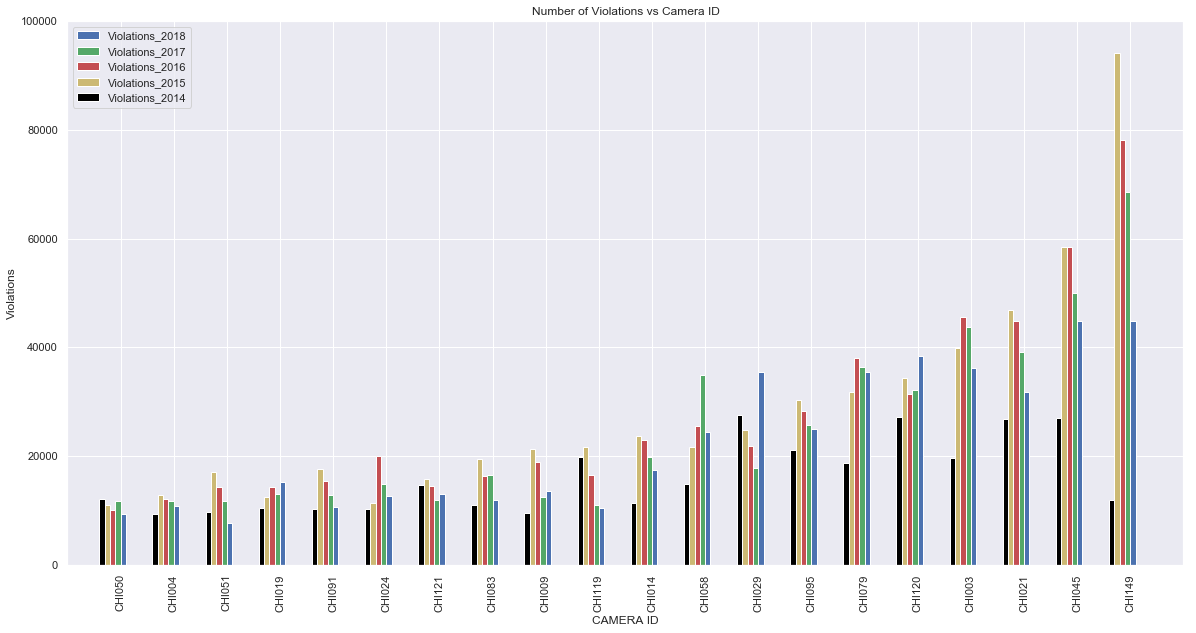

In [76]:
# bar graph for each year based on top 20 cameras from 2014
fig,ax = plt.subplots(figsize =(20,10) )
violations_finals.plot(kind = 'bar', x = 'CAMERA ID', y = 'Violations_2018', ax=ax, color = 'b', width = .1, position = 0,
        title = 'Number of Violations vs Camera ID')
violations_finals.plot(kind = 'bar', x = 'CAMERA ID', y = 'Violations_2017',ax=ax, color = 'g',width = .1, position = 1)
violations_finals.plot(kind = 'bar', x = 'CAMERA ID', y = 'Violations_2016',ax=ax, color = 'r',width = .1, position = 2)
violations_finals.plot(kind = 'bar', x = 'CAMERA ID', y = 'Violations_2015',ax=ax, color = 'y',width = .1,position = 3)
violations_finals.plot(kind = 'bar', x = 'CAMERA ID', y = 'Violations_2014',ax=ax, color = 'black',width = .1, position = 4)
plt.ylabel('Violations')
ax.set_xlim(-1,20)
ax.set_ylim(0,100000)